<a href="https://colab.research.google.com/github/ShyrleyFlor/ANALISIS_IMAGENES/blob/main/IA_TE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

se utiliza el modelo preentrenado MobileNetV2 para realizar la clasificación de las imágenes seleccionadas. Podemos ajustar el modelo y los parámetros según nuestras necesidades.

(1800, 1200, 3)
1/1 [==============================] - 1s 944ms/step


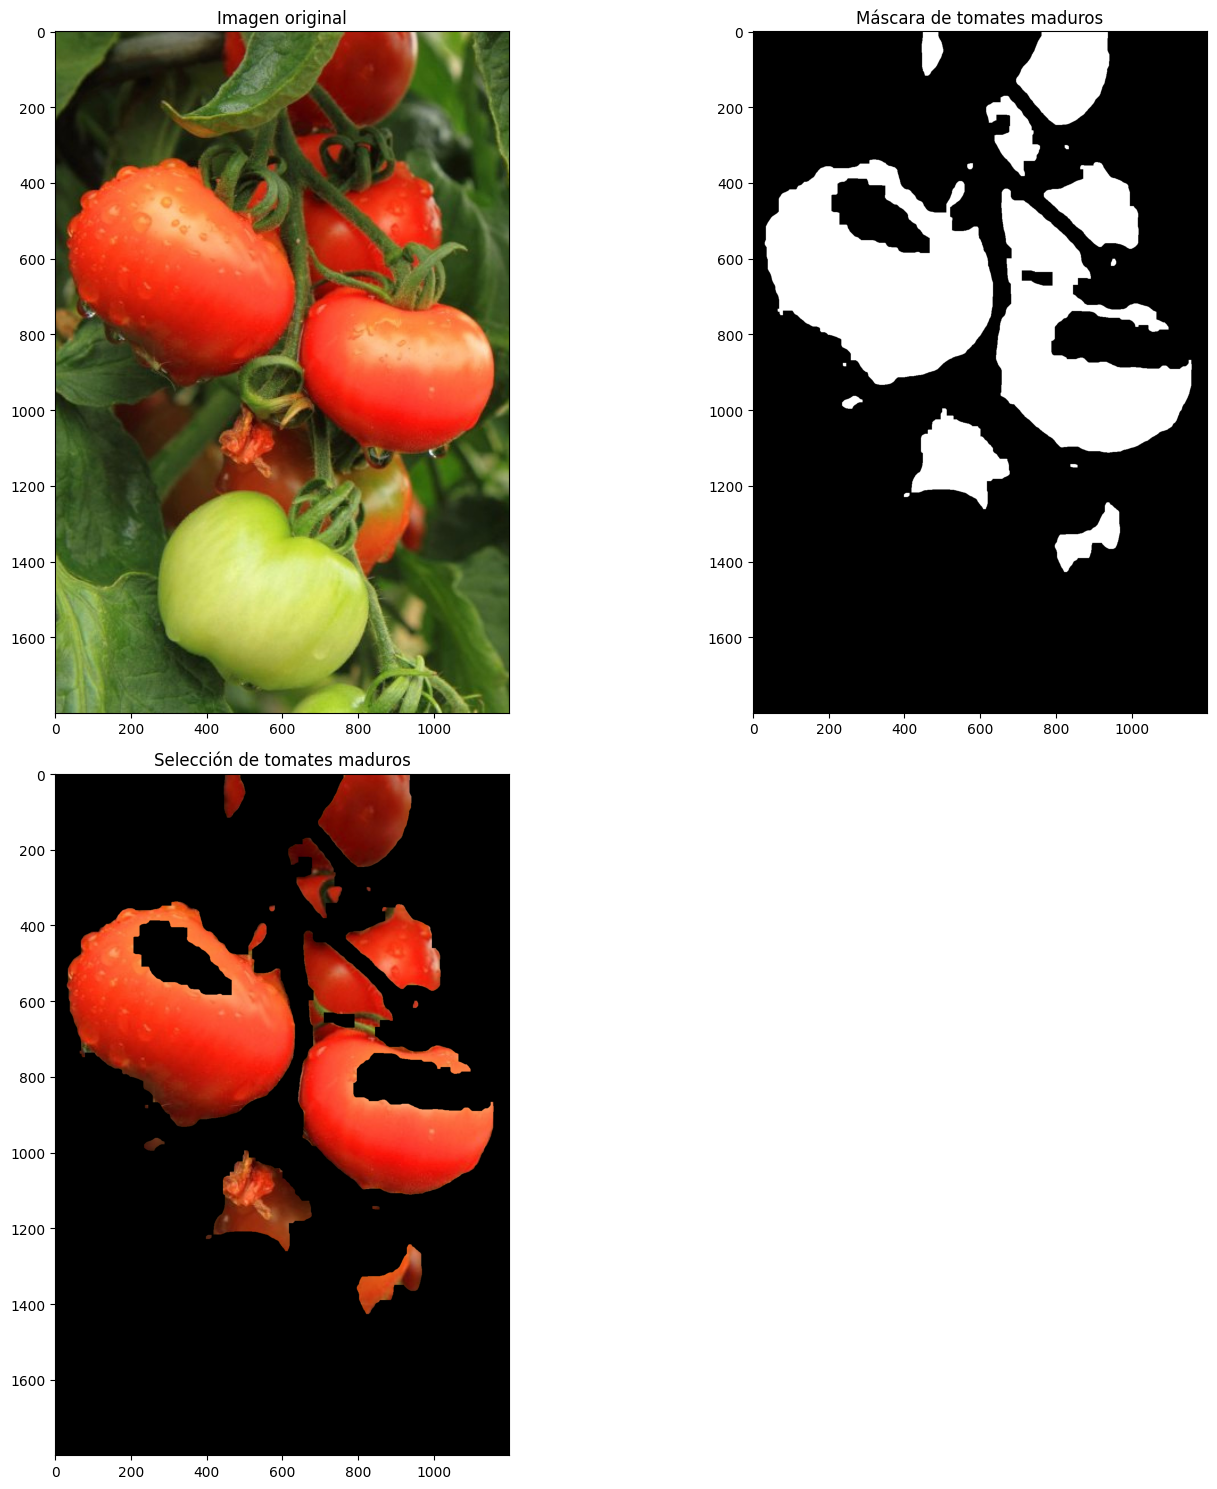

In [ ]:
# Definir y cargar el modelo de red neuronal previamente entrenado
modelo = tf.keras.applications.MobileNetV2(weights='imagenet')

def select_tomatoes(imagenBGR):
    imagenRGB = cv2.cvtColor(imagenBGR, cv2.COLOR_BGR2RGB)
    imagenHSV = cv2.cvtColor(imagenBGR, cv2.COLOR_BGR2HSV)

    # Aplicación de la transformación MEDIANA
    imagenHSV = cv2.GaussianBlur(imagenHSV, (9, 9), 25)
    imagenHSV = cv2.medianBlur(imagenHSV, 5)

    # SELECCIÓN DEL ROJO EN EL RANGO H:(0 - 10)
    inferior1 = np.array([0, 120, 70])
    superior1 = np.array([10, 255, 255])

    # SELECCIÓN DEL ROJO EN EL RANGO H:(160 - 180)
    inferior2 = np.array([160, 120, 70])
    superior2 = np.array([179, 255, 255])

    # MASCARAS DE SELECCIÓN DE TOMATES MADUROS
    mascara1 = cv2.inRange(imagenHSV, inferior1, superior1)
    mascara2 = cv2.inRange(imagenHSV, inferior2, superior2)

    mascara_tomates_maduros = mascara1 + mascara2

    # Aplicar la red neuronal al área seleccionada
    seleccion = cv2.bitwise_and(imagenRGB, imagenRGB, mask=mascara_tomates_maduros)
    seleccion = cv2.resize(seleccion, (224, 224)) # Ajustar el tamaño a la entrada del modelo
    seleccion = np.expand_dims(seleccion, axis=0) # Agregar una dimensión adicional para el lote
    seleccion = tf.keras.applications.mobilenet_v2.preprocess_input(seleccion) # Preprocesar la imagen
    predictions = modelo.predict(seleccion) # Realizar la predicción

    # Obtener las etiquetas y las probabilidades más altas
    etiquetas = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]
    etiquetas = [label[1] for label in etiquetas]
    probabilidades = [label[2] for label in etiquetas]

    # Aplicación de la transformación MORPHOLOGICAL_OPENING
    kernel = np.ones((7, 7), np.uint8)
    mascara_tomates_maduros = cv2.morphologyEx(mascara_tomates_maduros, cv2.MORPH_OPEN, kernel)

    # Aplicación de la transformación MORPHOLOGICAL_CLOSING
    kernel = np.ones((25, 25), np.uint8)
    mascara_tomates_maduros = cv2.morphologyEx(mascara_tomates_maduros, cv2.MORPH_CLOSE, kernel)

    # Aplicación de la transformación MORPHOLOGICAL_OPENING
    seleccion = cv2.bitwise_and(imagenRGB, imagenRGB, mask=mascara_tomates_maduros)

    return imagenRGB, mascara_tomates_maduros, seleccion, etiquetas, probabilidades

imagenBGR = cv2.imread('tomates.jpg')
print(imagenBGR.shape)

imagenRGB, mascara_tomates_maduros, seleccion, etiquetas, probabilidades = select_tomatoes(imagenBGR)

# Visualización de las imágenes resultantes
figura = plt.figure(figsize=(15,15))
ax1 = figura.add_subplot(2, 2, 1)
ax1.imshow(imagenRGB)
ax1.set_title('Imagen original')

ax2 = figura.add_subplot(2, 2, 2)
ax2.imshow(mascara_tomates_maduros, cmap='gray')
ax2.set_title('Máscara de tomates maduros')

ax3 = figura.add_subplot(2, 2, 3)
ax3.imshow(seleccion)
ax3.set_title('Selección de tomates maduros')

plt.tight_layout()
plt.show()

(1800, 1200, 3)


1/1 [==============================] - 1s 968ms/step


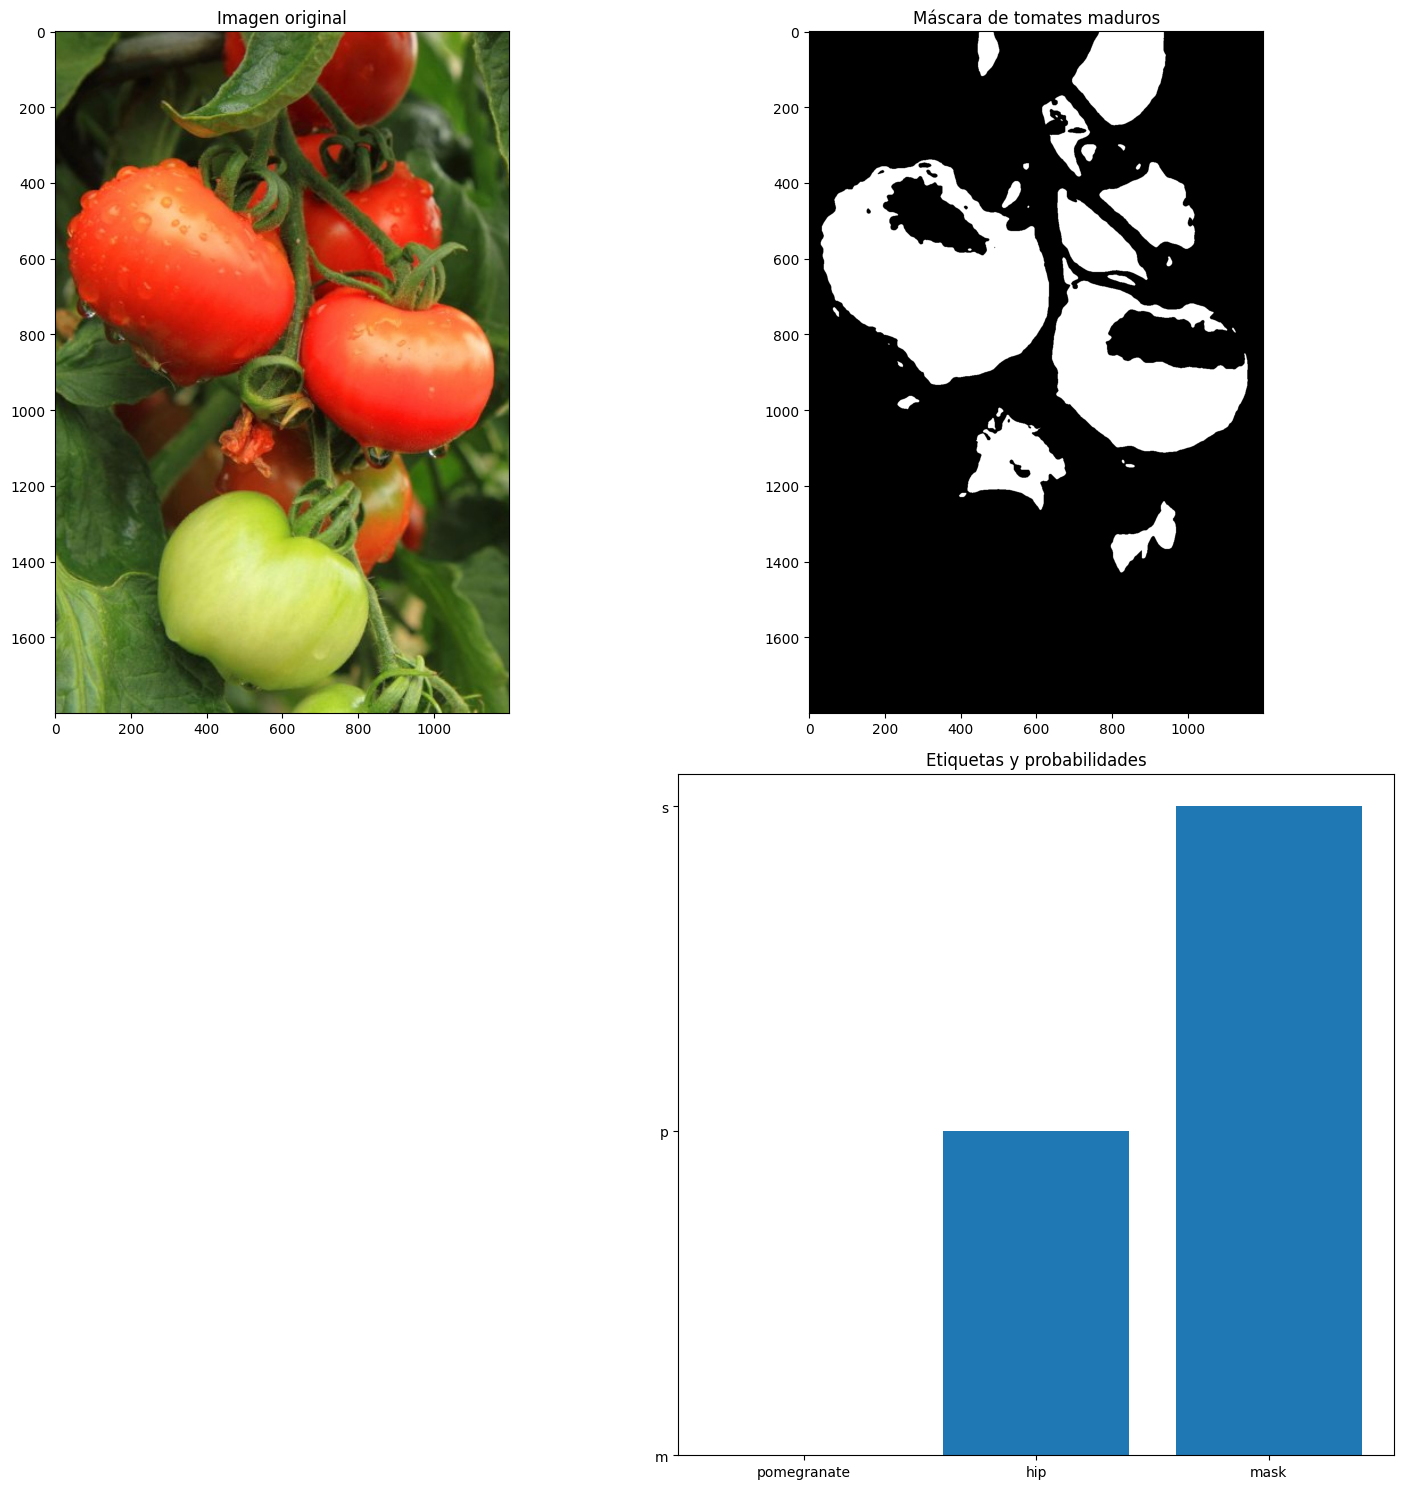

In [ ]:
# Definir y cargar el modelo de red neuronal previamente entrenado
modelo = tf.keras.applications.MobileNetV2(weights='imagenet')

def select_(imagenBGR):
    imagenRGB = cv2.cvtColor(imagenBGR, cv2.COLOR_BGR2RGB)
    imagenHSV = cv2.cvtColor(imagenBGR, cv2.COLOR_BGR2HSV)

    # Aplicación de la transformación MEDIANA
    imagenHSV = cv2.GaussianBlur(imagenHSV, (9, 9), 25)
    imagenHSV = cv2.medianBlur(imagenHSV, 5)

    # SELECCIÓN DEL ROJO EN EL RANGO H:(0 - 10)
    inferior1 = np.array([0, 120, 70])
    superior1 = np.array([10, 255, 255])

    # SELECCIÓN DEL ROJO EN EL RANGO H:(160 - 180)
    inferior2 = np.array([160, 120, 70])
    superior2 = np.array([179, 255, 255])

    # MASCARAS DE SELECCIÓN DE TOMATES MADUROS
    mascara1 = cv2.inRange(imagenHSV, inferior1, superior1)
    mascara2 = cv2.inRange(imagenHSV, inferior2, superior2)

    mascara_tomates_maduros = mascara1 + mascara2

    # Aplicar la red neuronal al área seleccionada
    seleccion = cv2.bitwise_and(imagenRGB, imagenRGB, mask=mascara_tomates_maduros)
    seleccion = cv2.resize(seleccion, (224, 224)) # Ajustar el tamaño a la entrada del modelo
    seleccion = np.expand_dims(seleccion, axis=0) # Agregar una dimensión adicional para el lote
    seleccion = tf.keras.applications.mobilenet_v2.preprocess_input(seleccion) # Preprocesar la imagen
    predictions = modelo.predict(seleccion) # Realizar la predicción

    return imagenRGB, mascara_tomates_maduros, seleccion, etiquetas, probabilidades

imagenBGR = cv2.imread('tomates.jpg')
print(imagenBGR.shape)

imagenRGB, mascara_tomates_maduros, seleccion, etiquetas, probabilidades = select_(imagenBGR)

# Visualización de las imágenes resultantes
figura = plt.figure(figsize=(15,15))
ax1 = figura.add_subplot(2, 2, 1)
ax1.imshow(imagenRGB)
ax1.set_title('Imagen original')

ax2 = figura.add_subplot(2, 2, 2)
ax2.imshow(mascara_tomates_maduros, cmap='gray')
ax2.set_title('Máscara de tomates maduros')

ax4 = figura.add_subplot(2, 2, 4)
ax4.bar(etiquetas, probabilidades)
ax4.set_title('Etiquetas y probabilidades')


plt.tight_layout()
plt.show()